mcmc

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3
# import pymc as pm
import scipy.stats as stats
import arviz as az

In [20]:
plt.style.use("ggplot")

Parameter values for prior and analytic posterior

In [21]:
n = 50
z = 10
alpha = 12
beta = 12
alpha_post = 22
beta_post = 52

How many samples to carry out for MCMC

In [22]:
iterations = 100000

Use PyMC3 to construct a model context

In [23]:
basic_model = pymc3.Model()
with basic_model:
    # Define our prior belief about the fairness
    # of the coin using a Beta distribution
    theta = pymc3.Beta("theta", alpha=alpha, beta=beta)

    # Define the Bernoulli likelihood function
    y = pymc3.Binomial("y", n=n, p=theta, observed=z)

    # Carry out the MCMC analysis using the Metropolis algorithm
    # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pymc3.find_MAP() 

    # Use the Metropolis algorithm (as opposed to NUTS or HMC, etc.)
    step = pymc3.Metropolis()

    # Calculate the trace
    trace = pymc3.sample(iterations, step, start, random_seed=1, progressbar=True)

The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.


/home/hung/.local/share/virtualenvs/xAlgo-Dn1iA2SI/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 100_000 draw iterations (4_000 + 400_000 draws total) took 18 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [24]:
# basic_model = pm.Model()
# with basic_model:
#     # Prior belief about the fairness of the coin using a Beta distribution
#     theta = pm.Beta("theta", alpha=alpha, beta=beta)
    
#     # Likelihood function (Bernoulli)
#     y = pm.Binomial("y", n=n, p=theta, observed=z)
    
#     # Carry out MCMC analysis using the Metropolis algorithm
#     step = pm.Metropolis()
#     trace = pm.sample(iterations=1000, step=step, random_seed=1, progressbar=True)

Plot the posterior histogram from MCMC analysis

(array([2.75318637e-04, 4.95573547e-03, 1.45918878e-02, 3.52407856e-02,
        5.94688256e-02, 1.21690838e-01, 2.51641234e-01, 3.92604377e-01,
        6.82790220e-01, 1.01179599e+00, 1.50434103e+00, 2.12050414e+00,
        2.87900699e+00, 3.61025329e+00, 4.36903145e+00, 5.37559639e+00,
        6.09720654e+00, 6.79541460e+00, 7.34302337e+00, 7.41405558e+00,
        7.50986646e+00, 7.29208942e+00, 6.88131402e+00, 6.41877871e+00,
        5.93008813e+00, 5.17488910e+00, 4.47943423e+00, 3.78122616e+00,
        3.06594834e+00, 2.43381675e+00, 1.91456580e+00, 1.40660292e+00,
        1.08750862e+00, 8.53212456e-01, 6.16713747e-01, 4.05269034e-01,
        2.78897779e-01, 1.81710301e-01, 1.18662333e-01, 9.71874789e-02,
        4.37756633e-02, 3.13863246e-02, 1.87216673e-02, 1.10127455e-02,
        7.15828457e-03, 2.20254910e-03, 2.75318637e-04, 5.50637274e-04,
        8.25955911e-04, 2.75318637e-04]),
 array([0.10758749, 0.11666788, 0.12574827, 0.13482865, 0.14390904,
        0.15298943, 0.1620

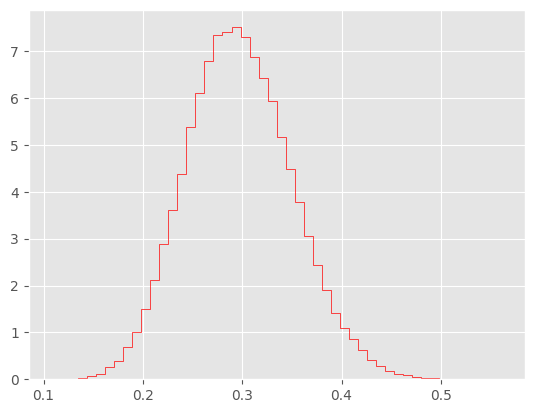

In [25]:
bins = 50
plt.hist(
    trace["theta"], bins, 
    histtype="step", density=True, 
    label="Posterior (MCMC)", color="red"
)


Plot the analytic prior and posterior beta distributions

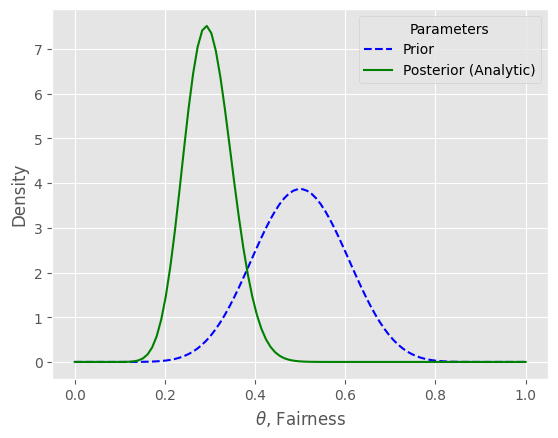

In [26]:
x = np.linspace(0, 1, 100)
plt.plot(
    x, stats.beta.pdf(x, alpha, beta), 
    "--", label="Prior", color="blue"
)
plt.plot(
    x, stats.beta.pdf(x, alpha_post, beta_post), 
    label='Posterior (Analytic)', color="green"
)
# Update the graph labels
plt.legend(title="Parameters", loc="best")
plt.xlabel("$\\theta$, Fairness")
plt.ylabel("Density")
plt.show()

Show the trace plot

Got error No model on context stack. trying to find log_likelihood in translation.
/home/hung/.local/share/virtualenvs/xAlgo-Dn1iA2SI/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
Got error No model on context stack. trying to find log_likelihood in translation.


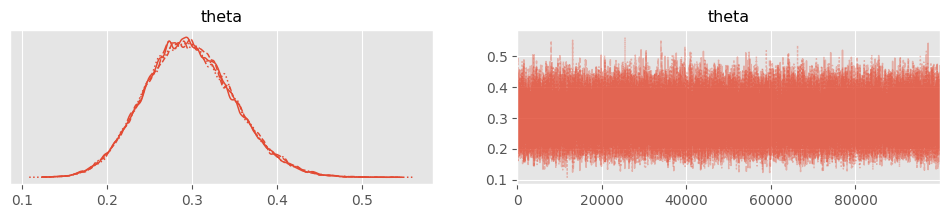

In [27]:
# pymc3.traceplot(trace)
# plt.show()

az.plot_trace(trace)
plt.show()
